In [1]:
# imports
import sys
import pandas as pd
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import core_exp as cx
import core_calib as cal
import core_tools as ct

In [2]:
params = {
    # exp
    "seed": 0,
    "runs": 1,
    "path": "../../",
    "exp_name": ct.generate_readable_short_id("Trees_S3"),
    "split": "CV", #CV, random_split

    "cv_folds": 10,
    "plot": True,
    "calib_methods": ["RF", 
                      "Platt", "ISO", "Beta", "CRF",
                     ],
    "metrics": ["acc", "tce", "logloss", "brier", "ece", "auc"],
    
    #data
    "data_name": "synthetic3",
    "plot_data": True,
    "data_size": 1000,
    "n_features": 6,

    "class1_mean_min":0, 
    "class1_mean_max":1,
    "class2_mean_min":1, 
    "class2_mean_max":3, 

    # calib param
    "bin_strategy": "uniform",
    "ece_bins": 20,
    "boot_size": 5000,
    "boot_count": 40,

    "opt_cv":5, 
    "opt_n_iter":40,
    "opt_top_K": 5,
    "search_space": {
                    "n_estimators": [10],
                    "max_depth": [2,3,4,5,6,7,8,10,15,20,30,40,50,60,100],
                    "criterion": ["gini", "entropy"],
                    "max_features": ["sqrt", "log2"],
                    "min_samples_split": [2,3,4,5],
                    "min_samples_leaf": [1,2,3],
                    },

    # RF hyper opt
    "oob": False,
    "laplace": 0, # if set to 1, OOB must be false

    "hyper_opt": "Manual",
    "depth": 4,

    "exp_key": "n_estimators",
    "exp_values":  [1,2,3,4,5,10] # 20,50,100,200,500 
}

In [3]:
calib_results_dict, data_list = cx.run_exp(params["exp_key"], params["exp_values"], params)
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=True, 
                                    std=True)

exp_param 1 done
exp_param 2 done
exp_param 3 done
exp_param 4 done
exp_param 5 done
exp_param 10 done


In [4]:
print(params["calib_methods"][tables["tce"].loc["Rank"].argmin()])
tables["tce"]

Platt


,RF,Platt,ISO,Beta,CRF
Data,,,,,
1,9.002601,1.192709,5.290113,4.799383,9.025458
2,8.351852,1.217950,8.414555,6.084181,8.380246
3,6.748718,1.256331,9.034518,5.758505,6.805695
4,7.143360,1.250893,8.974246,5.048851,7.196517
5,6.286298,1.275048,9.389257,5.399514,6.376749
10,5.857072,1.299397,9.429338,5.087178,5.969800
Mean,7.231650,1.248721,8.422005,5.362936,7.292411
Rank,3.166667,1.000000,4.666667,2.000000,4.166667


In [5]:
print(params["calib_methods"][tables["brier"].loc["Rank"].argmin()])
tables["brier"]

RF


,RF,Platt,ISO,Beta,CRF
Data,,,,,
1,0.062365,0.063800,0.064775,0.065047,0.064366
2,0.050459,0.052247,0.057181,0.055020,0.052001
3,0.047162,0.049944,0.054995,0.050707,0.047816
4,0.048713,0.051110,0.052271,0.051412,0.048029
5,0.044077,0.045645,0.049499,0.047684,0.045374
10,0.042992,0.045689,0.048752,0.047486,0.046823
Mean,0.049295,0.051406,0.054579,0.052893,0.050735
Rank,1.166667,2.666667,4.833333,4.166667,2.166667


In [6]:
plot_calib_methods = params["calib_methods"].copy()
# plot_calib_methods.remove("Rank")
# plot_calib_methods.remove("Elkan")
# plot_calib_methods.remove("RF")
plot_calib_methods

['RF', 'Platt', 'ISO', 'Beta', 'CRF']

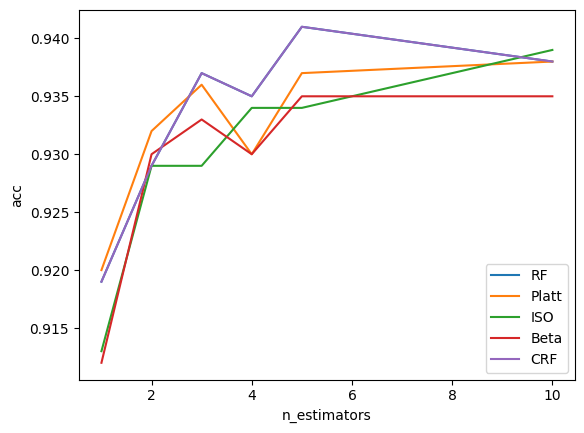

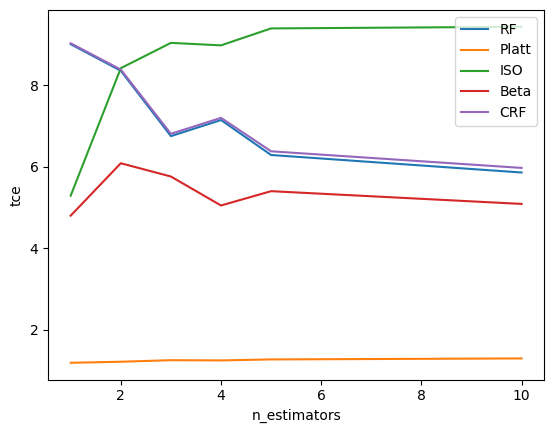

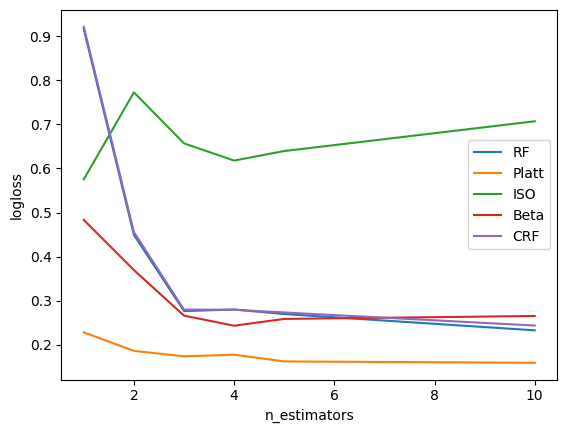

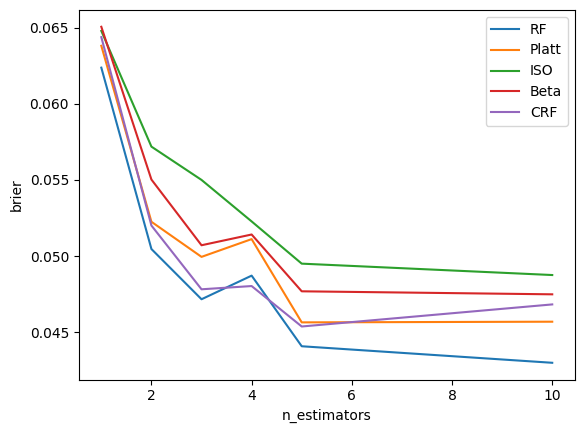

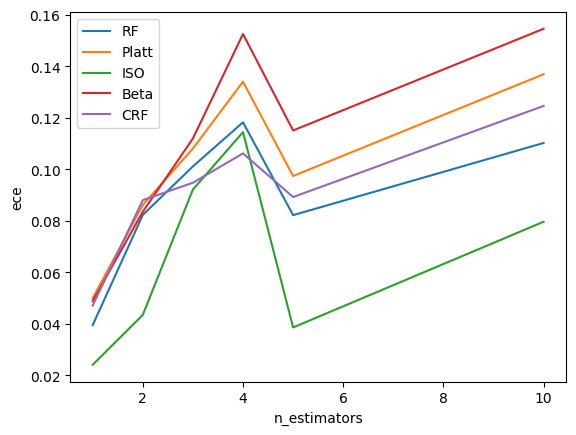

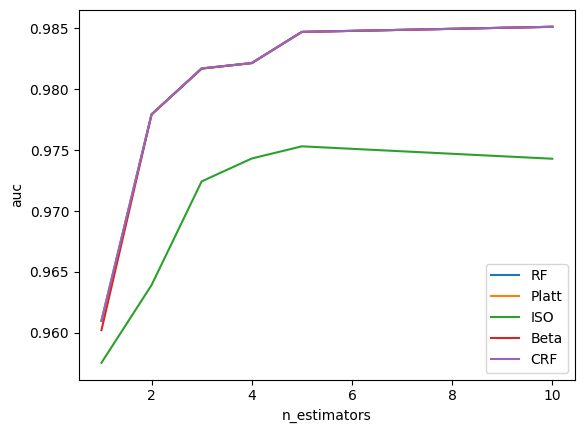

In [7]:
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=False, 
                                    std=True)
for metric in params["metrics"]:
    ax = tables[metric][plot_calib_methods].plot()
    ax.set_xlabel(params["exp_key"])
    ax.set_ylabel(metric)